In [1]:
import pandas as pd
import umap
from twilite.preprocessing import Matrix
from twilite.transformation import Decomposition
from twilite.model_tuning import Validation
from twilite.database import Storage
from twilite.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import json

In [2]:
creds = json.load(open("creds.json"))

In [3]:
hashtag = Pipeline(
    feature='hashtag',
    preprocess=Matrix(filter_by='frequency', user_num=5, ft_freq=50, ft_num=3),
    transform=Decomposition(mapper=umap.UMAP(n_components=2)),
    evaluate=Validation(model=KMeans, eval_range=range(2, 10), metric=silhouette_score),
    database=Storage(creds=creds, db='alz')
)

In [4]:
hashtag.run()

<AxesSubplot:xlabel='xcord', ylabel='ycord'>

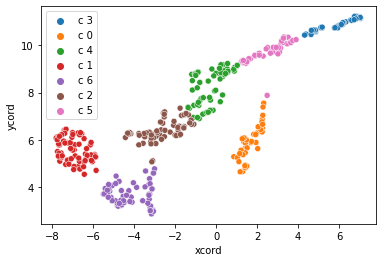

In [5]:
hashtag.scatter_plot()